##### Quantum Data Science (LCD) 2025/2026
### Lecture 4 - Grover's Algorithm


1. [Grover's Algorithm](#Grover) <p>
   a.  [Unstructured search](#unstructured-search) <p>
   b.  [Oracle](#oracle_intro) <p>
   c.  [Amplitude Amplification](#amplitude_amp) <p>
2. [Grover's algorithm with 2 qubits](#grover2)
3. [Grover's algorithm with 5 qubits](#grover3)
4. [Removing the ancilla](#ancilla)

## 1. Grover's algorithm <a id="grover"></a>

Grover's algorithm is one of the most powerful quantum algorithms. The algorithm is known for a quadratic speed up in searching for an element in an **unstructured database**. 

Grover's algorithm can be used in any problem that can be restated as an unstructured search problem:

* Finding minimum/maximum/mean 
* Collision problem 
* Satisfiability 
* Optimization in general. 

### a. Unstructured Search <a id="unstructured-search"></a>

Suppose you have an array of $N$ items. Consider that $w$ for winner is the element we want to find. 

![image1](images/list.png)

Classic $\quad \Rightarrow \quad \mathcal{O}(N)$

Quantum $\quad \Rightarrow \quad \mathcal{O}(\sqrt{N})$

### b. Oracle

Notice that we want to exploit the superposition principle, therefore, all entries in the above database will happen at the same time! Thus, for us, the database is composed by all computational basis states our qubits can be in.

The oracle $U_w$ adds a negative phase to the solution states i.e. for any state $|x\rangle$ in the computational basis corresponding to the winner:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

we can use an ancilla to store the result of the function! 


Similar to Deutsch-Jozsa, we initialize the 'output' qubit in the state $|{-}\rangle$, and the phase kickback effect do the rest.
</p><p>  

![image1](images/function.png)


Now, the goal is to find a routine that amplifies the probability of measuring the winner state! 

### c. Amplitude Amplification <a id="amplitude_amp"></a>

The Diffusion operator $D$ is a reflection about the mean of the amplitudes. It is defined as:

$$D = 2|DB \rangle \langle DB| - I$$

where |DB\rangle is the database superposition quantum state. D amplifies the amplitude of the winner state.

Full Grover's circuit is:
![image5](images/full_circuit.png)

## 2. Grover's algorithm with 2 qubits <a id="grover2"></a>

Maximize the probability of the state $|01\rangle$.

Build the Grover's algorithm and check the probabilities 

In [29]:
import pennylane as qml
from pennylane import numpy as np


# Suggestion: Implement a general function for Grover's algorithm with the goal of maximizing the probability of measuring basis states.  
# Imagine you are given an id . For instance, let n_qubits = 2 and the id [1, 1] correspond to the basis state |11> which probability we want to maximize.

def grover(input_qubits, ancilla_qubit, id, n_iterations):


    #1) superposition for input qubits
    for q in input_qubits:
        qml.Hadamard(wires=q)

    #create ancilla in |-> state
    qml.PauliX(wires=ancilla_qubit)
    qml.Hadamard(wires=ancilla_qubit)
    
    qml.Barrier()

    for iterations in range(n_iterations):     

        #2) Oracle
        #percorrer a lista do id e aplicar PauliX quando o bit for 0 
        for i,q in enumerate(id):
            if q==0:
                qml.PauliX(wires=input_qubits[i])


        #you can use a controlled gate
        qml.ctrl(qml.PauliX , control=input_qubits)(wires=ancilla_qubit)

        #devolver os qubits de input ao estado original 
        for i,q in enumerate(id):
            if q==0:
                qml.PauliX(wires=input_qubits[i])


        qml.ctrl(qml.PauliX , control=input_qubits)(wires=ancilla_qubit)


        qml.Barrier()

        #3) Diffusion
        
        # Hadamards e pauli x 
        for q in input_qubits:
            qml.Hadamard(wires=q)
            qml.PauliX(wires=q)


        # Controlled Z que é igual a controllled PauliX + Hadamards de ambos os lados 
        qml.ctrl(qml.PauliZ , control=input_qubits[:-1])(wires=input_qubits[-1])

        #mesma coisa que 
        #qml.Hadamard(wires=input_qubits[-1])
        #qml.ctrl(qml.PauliX , control=input_qubits[:-1])(wires=input_qubits[-1])
        #qml.Hadamard(wires=input_qubits[-1])
    
        # Pauli X e Hadamard
        for q in input_qubits:
            qml.PauliX(wires=q)
            qml.Hadamard(wires=q)
        qml.Barrier()


    #measurement
    return qml.probs(wires=input_qubits)


(<Figure size 1700x500 with 1 Axes>, <Axes: >)

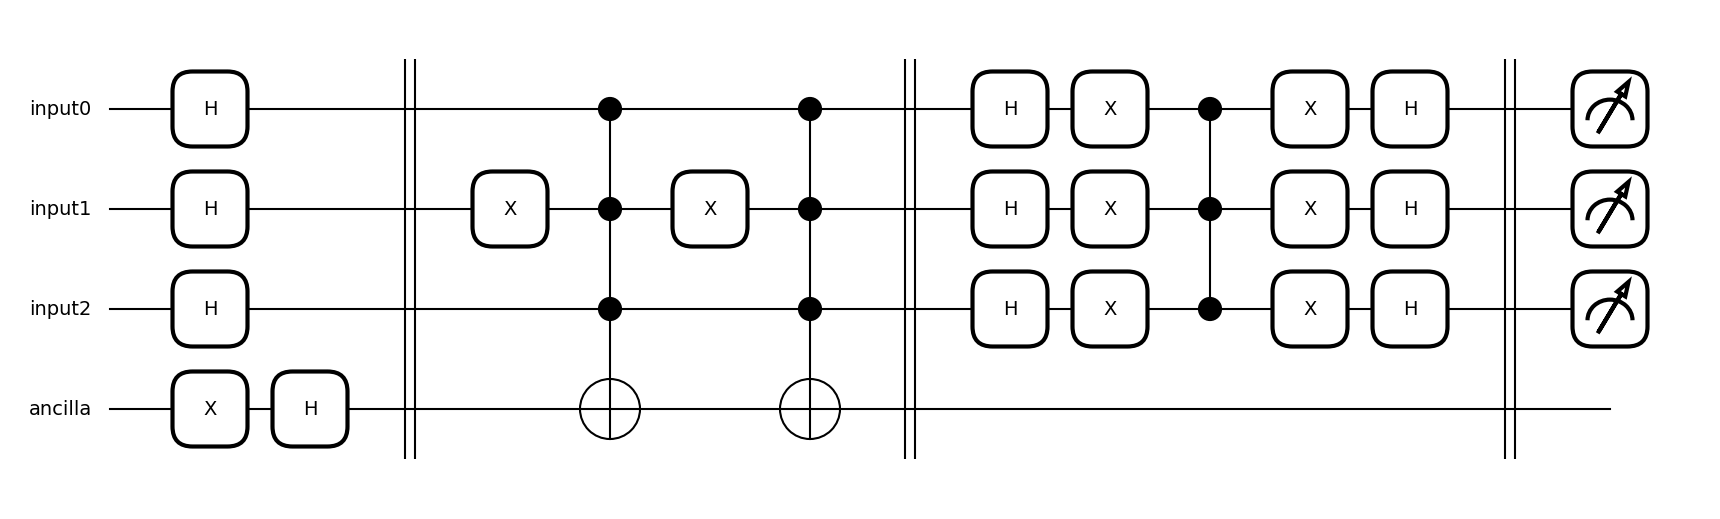

In [30]:
#initialize qubits and circuit
n_qubits_input = 3
input_qubits =["input{}".format(i) for i in range(n_qubits_input)]

ancilla_qubit = ["ancilla"]

dev = qml.device("default.qubit", wires=input_qubits + ancilla_qubit)

qcircuit = qml.qnode(dev)(grover)

#queremos maximizar a probabilidade de medir o estado |11>
id = [1,0,1]

#numero de iteraçoes para o oraculo + difusor
n_iterations = 1

#visualize the circuit
qml.draw_mpl(qcircuit)(input_qubits, ancilla_qubit, id, n_iterations)


In [31]:
qcircuit(input_qubits, ancilla_qubit, id, n_iterations)

array([0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5])

In [ ]:
#Run the algorithm


#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)
plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")


## 3. Grover's algorithm with 5 qubits <a id="grover3"></a>  


Maximize probability of $|01011\rangle$. Run Grover's algorithm and check the probabilities.

In [ ]:
#Run the algorithm and visualize the probability histogram

## 4. Remove the ancilla <a id="ancilla"></a>

Rewrite the Grover's algorithm without the ancilla qubit - find one of the states $\{|0000\rangle , |0010\rangle , |0100\rangle , |1000\rangle \}$.

( Noticing that the oracle is a phase flip operator |)